In [9]:
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00


   去年首檔台股月配息 ETF－－復華台灣科技優息 ETF00929問世僅花五個月就達成千億規模最速傳說台灣 ETF 圈開始掀起高股息月月配熱潮在今年 3 月才剛募集結束的元大臺灣價值高息 ETF00940還未上市規模更是已達 1750 億直接空降成為台股第四大的高股息 ETF可見月配息 ETF 對於台灣投資人真的非常具有吸引力到底月配息 ETF 有哪些買月配息 ETF 真的好處多多嗎需要注意什麼本篇文章將帶大家更認識月配息 ETF最後還會推薦幾檔值得關注的台股美股月配息 ETF 喔  台股月配息 ETF 有哪些    買月配息 ETF 有何好處  1.填息機率高   改成月配息之後它的配發金額也會被分散舉例來說原本一年配息 4 元但改成月配之後就會變成每月配息 0.33 元因此每次除息的缺口就會變小ETF 填息的機率也會變高   2.穩定現金流   月配息 ETF 最吸引人地方也就是每個月都有穩定現金流等於躺著就能額外幫自己加薪對於小資族退休族群是個不錯的選擇 3.省二代健保  根據現行法規只要單筆股利低於兩萬就不用繳交二代健保費對於持有張數較多的人來說可以省下不少補充保費  買月配息 ETF 需要注意什麼  1.配息可能來自於本金  投信公司為了維持高配息率可能會從本金裡面配出股利讓股票的本金越來越低當一檔  ETF 淨值長期向下就會發生賺了配息賠了本金的窘境  2.匯費隱藏成本  如果是持有張數比較少的投資人每次股息發放時的匯款手續費都會吃掉你一部分的股息這也是必須要注意到的隱藏成本但對於持有張數較多的投資人影響就相對較小  月配息高股息 ETF 推薦  00929 復華台灣科技優息 簡介00929 是台股第一檔月配息的股票型 ETF成分股百分百以科技類股為主篩選主要是以 2 高 3 低為原則高ROE高現金股利低波動度低本益比低股息變異性最後選出 40 檔作為成分股組成  掛牌時間2023 年 6 月  首次除息月份2023 年 7 月  每單位配息元0.13​​2024M2  收益平準金有  追蹤指數特選臺灣科技優息指數  資產規模1619.71 億截至 2024 年 3 月 21 日  前五大持股聯發科2454大聯大3702群光2385聯詠3034力成6239 00940 元大臺灣價值高息 簡介00940 是台灣首檔結合巴菲特價值投資的高股息 ETF從台

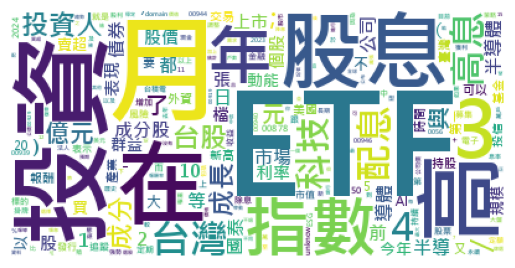

<Figure size 4000x2000 with 0 Axes>

,詞頻
ETF,432
月,295
投資,244
在,188
高,181
...,...
碰上,1
俄烏,1
來臨,1
隔年,1


In [18]:
import jieba
import nltk

import pandas as pd
from sqlalchemy import create_engine

jieba.load_userdict('/content/drive/MyDrive/大學專題/新聞面/dict.txt.big') # 輸入自己字典的路徑

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 讀取CSV檔案
df = pd.read_csv('/content/drive/MyDrive/大學專題/新聞面/新聞Data.csv')

# 合併所有新聞內容
all_content = ' '.join(df['content'].dropna())

all_content = all_content.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
print(all_content)

jieba.setLogLevel(20)

Sentence = jieba.cut(all_content, cut_all=True)
print('全模式'+": "  + "/ ".join(Sentence) + '\n')

Sentence = jieba.cut(all_content, cut_all=False)
print('精確模式'+": " + "/ ".join(Sentence)+ '\n')

Sentence = jieba.cut(all_content)
print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')

Sentence = jieba.cut_for_search(all_content)
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n')

# 設定停用字詞
stopwords = {}.fromkeys(["也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對","就", '\n','越','為','這種','多','越來',' '])
#stopwords = {"也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對","就",'\n','越','為','這種','多','越來',' '}

# 使用cut_for_search(搜尋引擎)斷詞模式並產生字詞頻率的dictionary (並剔除stopwords的計算)
Sentence = jieba.cut_for_search(all_content)

# create a python dictionary
hash = {}
for item in Sentence:

    if item in stopwords:
        continue

    if item in hash:
        hash[item] += 1
    else:
        hash[item] = 1

# 文字雲樣式設定
wc = WordCloud(font_path="/content/drive/MyDrive/大學專題/新聞面/MSJHBD.TTC", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞

# 使用dictionary的內容產生文字雲
wc.generate_from_frequencies(hash)

# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(20,10), dpi =200)
plt.show()

artDf = pd.DataFrame.from_dict(hash, orient='index', columns = ['詞頻'])
artDf.sort_values(by= ['詞頻'], ascending= False)

In [ ]:
from wordcloud import WordCloud
import pandas as pd
import jieba

# 讀取CSV檔案
df = pd.read_csv('/content/drive/MyDrive/大學專題/新聞面/新聞Data.csv')

# 合併所有新聞內容
all_content = ' '.join(df['content'].dropna())

# 使用結巴分詞進行分詞
seg_list = jieba.cut(all_content, cut_all=False)

# 拼接分詞結果
seg_content = ' '.join(seg_list)

# 生成文字雲
wordcloud = WordCloud(font_path='/content/drive/MyDrive/大學專題/新聞面/MSJHBD.TTC', width=800, height=400, background_color='white').generate(seg_content)

# 顯示文字雲
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from collections import Counter

# 使用結巴分詞進行分詞
seg_list = jieba.cut(all_content, cut_all=False)

# 計算詞頻
word_freq = Counter(seg_list)

# 轉換成 DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['詞', '出現次數'])

# 顯示前幾行
print(word_freq_df.head())